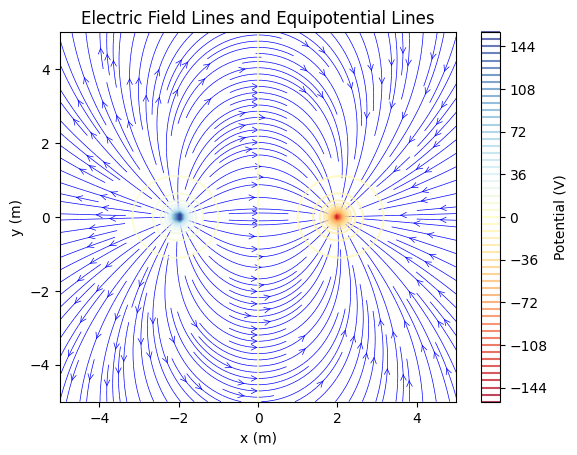

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k = 8.99e9  # Coulomb's constant in N m²/C²

# Define a class for a point charge
class PointCharge:
    def __init__(self, q, position):
        self.q = q  # Charge in Coulombs
        self.position = np.array(position)  # Position as an (x, y) tuple

    def electric_field(self, x, y):
        """
        Calculate the electric field vector at a point (x, y) due to this charge.
        E = k * q * r / |r|^3
        """
        r = np.array([x, y]) - self.position  # Position vector relative to charge
        r_magnitude = np.linalg.norm(r)  # Distance from charge to point
        if r_magnitude == 0:
            return np.array([0, 0])  # Avoid division by zero at charge location
        return k * self.q * r / r_magnitude**3

    def potential(self, x, y):
        """
        Calculate the electric potential at a point (x, y) due to this charge.
        V = k * q / |r|
        """
        r = np.array([x, y]) - self.position
        r_magnitude = np.linalg.norm(r)
        if r_magnitude == 0:
            return 0  # Avoid division by zero
        return k * self.q / r_magnitude

# Define a function to calculate the total electric field due to multiple charges
def total_electric_field(charges, x, y):
    """
    Calculate the total electric field at a point (x, y) due to all charges.
    """
    E_total = np.array([0.0, 0.0])
    for charge in charges:
        E_total += charge.electric_field(x, y)
    return E_total

# Define a function to calculate the total potential due to multiple charges
def total_potential(charges, x, y):
    """
    Calculate the total electric potential at a point (x, y) due to all charges.
    """
    V_total = 0.0
    for charge in charges:
        V_total += charge.potential(x, y)
    return V_total

# Visualization Functions (Already Provided)

def plot_electric_field_lines(charges, xlim=(-5, 5), ylim=(-5, 5), grid_size=100):
    """
    Plot electric field lines due to multiple charges.
    """
    x = np.linspace(xlim[0], xlim[1], grid_size)
    y = np.linspace(ylim[0], ylim[1], grid_size)
    X, Y = np.meshgrid(x, y)

    Ex, Ey = np.zeros(X.shape), np.zeros(Y.shape)

    # Calculate electric field at each grid point
    for i in range(grid_size):
        for j in range(grid_size):
            E = total_electric_field(charges, X[i, j], Y[i, j])
            Ex[i, j], Ey[i, j] = E

    plt.streamplot(X, Y, Ex, Ey, color='blue', linewidth=0.5, density=2, arrowstyle='->')
    plt.title('Electric Field Lines')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.show()

def plot_equipotential_lines(charges, xlim=(-5, 5), ylim=(-5, 5), grid_size=100):
    """
    Plot equipotential lines due to multiple charges.
    """
    x = np.linspace(xlim[0], xlim[1], grid_size)
    y = np.linspace(ylim[0], ylim[1], grid_size)
    X, Y = np.meshgrid(x, y)

    V = np.zeros(X.shape)

    # Calculate potential at each grid point
    for i in range(grid_size):
        for j in range(grid_size):
            V[i, j] = total_potential(charges, X[i, j], Y[i, j])

    plt.contour(X, Y, V, levels=50, cmap='RdYlBu')
    plt.title('Equipotential Lines')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.colorbar(label='Potential (V)')
    plt.show()

def combined_plot(charges, xlim=(-5, 5), ylim=(-5, 5), grid_size=100):
    """
    Combine electric field lines and equipotential lines into one plot.
    """
    x = np.linspace(xlim[0], xlim[1], grid_size)
    y = np.linspace(ylim[0], ylim[1], grid_size)
    X, Y = np.meshgrid(x, y)

    Ex, Ey = np.zeros(X.shape), np.zeros(Y.shape)
    V = np.zeros(X.shape)

    # Calculate both electric field and potential at each grid point
    for i in range(grid_size):
        for j in range(grid_size):
            E = total_electric_field(charges, X[i, j], Y[i, j])
            Ex[i, j], Ey[i, j] = E
            V[i, j] = total_potential(charges, X[i, j], Y[i, j])

    plt.streamplot(X, Y, Ex, Ey, color='blue', linewidth=0.5, density=2, arrowstyle='->')
    plt.contour(X, Y, V, levels=50, cmap='RdYlBu', alpha=0.75)
    plt.title('Electric Field Lines and Equipotential Lines')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.colorbar(label='Potential (V)')
    plt.show()

# Example usage
if __name__ == "__main__":
    charge1 = PointCharge(1e-9, (-2, 0))  # +1nC charge at (-2, 0)
    charge2 = PointCharge(-1e-9, (2, 0))  # -1nC charge at (2, 0)

    charges = [charge1, charge2]

    combined_plot(charges)
